# Digit Recognition Using MNIST

Original Video: [Link](https://www.youtube.com/watch?v=u3FLVbNn9Os)

> Actually, this is the second times I did this again this days, the first url is fail - But's fine

In [1]:
import tensorflow as tf

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
mnist = tf.keras.datasets.mnist

## Train and Test datasets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

## Visualizing the image

In [5]:
import matplotlib.pyplot as plt

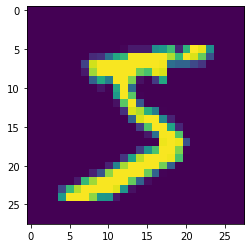

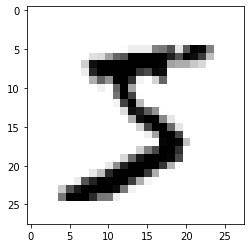

In [6]:
plt.imshow(X_train[0])
plt.show()

plt.imshow(X_train[0], cmap = plt.cm.binary)

## Checkint the values of each pixel

### Before Normalization

In [7]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

As Images are in gray level (1 Channel ==> 0 to 255), (Black ==> White)

## Normalizing the data | Preprocessing Step

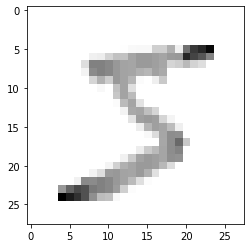

In [8]:
X_train = tf.keras.utils.normalize (X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
plt.imshow(X_train[0], cmap = plt.cm.binary)

### After Normalization

In [9]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[0])

5


## Resizing the images for Convolutional Operations

In [11]:
print("X_train samples before resize", X_train.shape)
print("X_test samples before resize", X_test.shape)

X_train samples before resize (60000, 28, 28)
X_test samples before resize (10000, 28, 28)


In [12]:
import numpy as np 
IMG_SIZE = 28
X_train_resized = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # Increasing one dimension for kernel-filter operations
X_test_resized = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # Increasing one dimension for kernel operation
print("Training Samples Dimensions", X_train_resized.shape)
print("Testing Samples Dimensions", X_test_resized.shape)

Training Samples Dimensions (60000, 28, 28, 1)
Testing Samples Dimensions (10000, 28, 28, 1)


## Create a Deep Neural Network

### Training 60000 samples

In [13]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

In [14]:
# Creating a neural network now
model = Sequential()

###### First Convolutional Layer (0, 1, 2, 3) ===> (60000, 28, 28, 1) 28 -3 + 1 = 26 * 26
model.add(Conv2D(64, (3,3), input_shape = X_train_resized.shape[1:])) # Only convolution the first (the picture ===> 60000)
model.add(Activation('relu')) # Activation function to make it non linear, <0, remove, >0
model.add(MaxPooling2D(pool_size=(2,2))) # MaxPooling single maximum value of 2x2

###### Second Convolutional Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

###### Third Convolutional Layer 
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

###### Fully Connected Layer # 1 ==> 20 * 20 - 400
model.add(Flatten()) # Before using fully connected layer, image will be flatten 2D to 1D
model.add(Dense(64))
model.add(Activation('relu'))

##### Fully Connected Layer # 2
model.add(Dense(32))
model.add(Activation('relu'))

##### Last Fully Connected Layer, output must be equal to digit classess => 10 class (0 - 9)
model.add(Dense(10)) # The last dense must be equal to 10
model.add(Activation('softmax')) # Using Softmax for class probabilities (you can use sigmoid for binary) because this is not binary

# If we try to find binary the activation will be sigmoid

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [16]:
print('Total Training Samples:', len(X_train_resized))

Total Training Samples: 60000


In [17]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [18]:
model.fit(X_train_resized, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 56s 41ms/step - loss: 0.6942 - accuracy: 0.7712 - val_loss: 0.1250 - val_accuracy: 0.9614
Epoch 2/5
1313/1313 [==============================] - 55s 42ms/step - loss: 0.1091 - accuracy: 0.9672 - val_loss: 0.0968 - val_accuracy: 0.9713
Epoch 3/5
1313/1313 [==============================] - 55s 42ms/step - loss: 0.0723 - accuracy: 0.9780 - val_loss: 0.0745 - val_accuracy: 0.9771
Epoch 4/5
1313/1313 [==============================] - 55s 42ms/step - loss: 0.0574 - accuracy: 0.9819 - val_loss: 0.0791 - val_accuracy: 0.9757
Epoch 5/5
1313/1313 [==============================] - 55s 42ms/step - loss: 0.0445 - accuracy: 0.9863 - val_loss: 0.0775 - val_accuracy: 0.9764


In [19]:
### Evaluatin g on testing data set MNIST
test_loss, test_acc = model.evaluate(X_test_resized, y_test)
print("Test loss on 10000 test samples", test_loss)
print("Validation Accuracy on 10000 samples test samples", test_acc)


313/313 [==============================] - 4s 12ms/step - loss: 0.0729 - accuracy: 0.9782
Test loss on 10000 test samples 0.07294876873493195
Validation Accuracy on 10000 samples test samples 0.9782000184059143


## Predictions

In [20]:
predictions = model.predict([X_test_resized])

In [21]:
print(predictions) # This output actually based on one hot encoding (softmax) so it need to be converted first

[[5.3548912e-09 6.4356677e-06 4.8016072e-06 ... 9.9990296e-01
  9.7985662e-08 7.4907621e-05]
 [1.2266466e-03 2.2935415e-04 9.9846673e-01 ... 1.5496249e-06
  2.7151234e-06 3.8998942e-06]
 [3.3259449e-09 9.9999714e-01 2.8177200e-07 ... 2.2192768e-07
  6.0631247e-09 7.9589506e-07]
 ...
 [2.7793179e-08 1.6453690e-05 4.2801653e-07 ... 2.4016959e-08
  4.6320138e-06 2.5431873e-05]
 [2.5685654e-07 2.0168052e-09 4.1101043e-08 ... 1.5290941e-07
  2.1475786e-05 4.0701676e-07]
 [5.8549558e-05 3.0535682e-06 1.0710522e-04 ... 4.9468957e-10
  4.4815016e-07 4.5603856e-06]]


In [22]:
print(np.argmax(predictions[0])) # Argmax will return the maximum value index and find the value of it

7


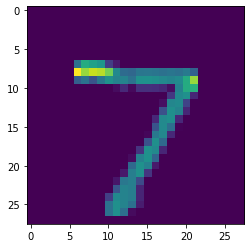

In [23]:
plt.imshow(X_test[0])

In [24]:
print(np.argmax(predictions[256]))

2


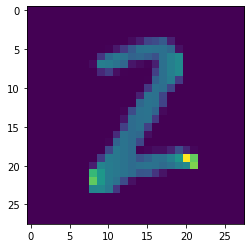

In [25]:
plt.imshow(X_test[256])

## Let's Testing with Paint Software

In [26]:
import cv2

In [27]:
img = cv2.imread('test1.png')

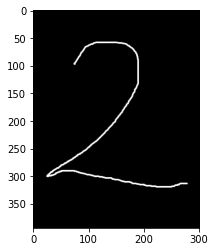

In [28]:
plt.imshow(img)

In [29]:
img.shape

(394, 301, 3)

In [30]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [31]:
gray.shape

(394, 301)

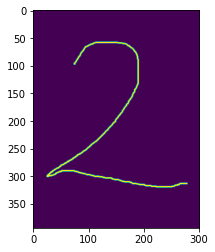

In [32]:
plt.imshow(gray)

In [33]:
resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)

In [34]:
resized.shape

(28, 28)

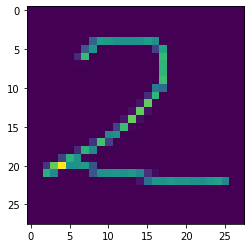

In [35]:
plt.imshow(resized)

In [36]:
new_img = tf.keras.utils.normalize(resized, axis = 1) # Scale to change it from 0 to 1

In [37]:
new_img = np.array(new_img).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # Kernel operations of Convolutional Layer

In [38]:
new_img.shape

(1, 28, 28, 1)

In [39]:
predictions = model.predict(new_img)

In [40]:
predictions

array([[4.4368530e-06, 2.7720446e-03, 4.2601109e-01, 5.6631637e-01,
        3.1856751e-05, 2.4311903e-06, 8.9161372e-09, 2.6515210e-03,
        1.4383607e-03, 7.7194168e-04]], dtype=float32)

In [41]:
print(np.argmax(predictions))

3


## Testing 2

I recognize the number is: 8


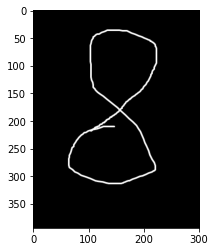

In [42]:
img2 = cv2.imread('test2.png')
plt.imshow(img2)

# Processing Image to be predicted
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
resized2 = cv2.resize(gray2, (28, 28), interpolation=cv2.INTER_AREA)
example2 = tf.keras.utils.normalize(resized2, axis=1)
example2 = np.array(example2).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

predictions2 = model.predict(example2)
print("I recognize the number is:", np.argmax(predictions2))

## Building Simple Function For Prediction

In [43]:
def prediction(test_img):
    img = cv2.imread(test_img)   
    plt.imshow(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray,(28, 28), interpolation = cv2.INTER_AREA)
    example = tf.keras.utils.normalize(resized, axis=1)
    example = np.array(example).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    predictions = model.predict(example)
    print("I recognize the number in this Picture is:", np.argmax(predictions))

I recognize the number in this Picture is: 3


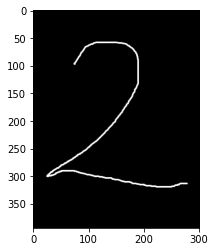

In [44]:
prediction('test1.png')

I recognize the number in this Picture is: 8


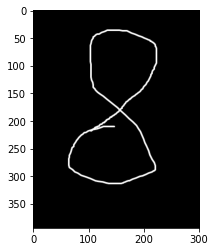

In [45]:
prediction('test2.png')

I recognize the number in this Picture is: 3


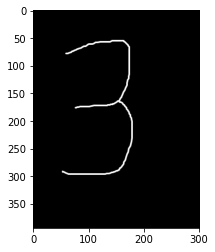

In [46]:
prediction('test3.png')

I recognize the number in this Picture is: 5


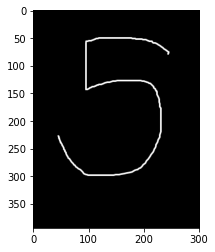

In [47]:
prediction('test4.png')

I recognize the number in this Picture is: 4


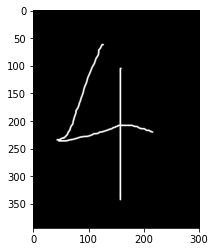

In [48]:
prediction('test5.png')

I recognize the number in this Picture is: 6


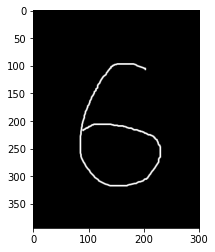

In [49]:
prediction('test6.png')

I recognize the number in this Picture is: 4


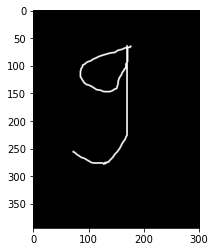

In [50]:
prediction('test7.png')

I recognize the number in this Picture is: 1


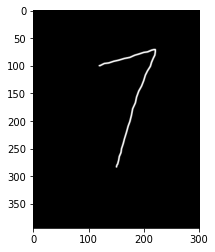

In [51]:
prediction('test8.png')

## Video Predictions

In [52]:
import numpy as np
import cv2

font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

capt = cv2.VideoCapture('test_video.mp4')
if not capt.isOpened():
    capt = cv2.VideoCapture(0)
if not capt.isOpened():
    raise IOError('Cannot Open the video')

text = "Let me predict your digit in the video..."

### Get the width and height of text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, thickness=1)[0]

### Set starting position
text_offset_x = 10
text_offset_y = img.shape[0] - 25

cntr = 0
while True:
    ret,frame = capt.read()
    cntr = cntr+1
    if((cntr % 2) == 0):

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
        example = tf.keras.utils.normalize(resized, axis=1)
        example = np.array(example).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
        predictions = model.predict(example)
        status = np.argmax(predictions)

        print(status)
        print(type(status))

        x1, y1, w1, h1 = 0, 0, 175, 75
        ### Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,255,0), -1)
        ### Add Tet
        cv2.putText(frame, status.astype(str), (x1 + int(w1/5), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

        cv2.imshow('Digit Handwritten Recognitions', frame)

        if cv2.waitKey(2) & 0xFF == ord('q'):
            break

capt.release()
cv2.destroyAllWindows()

3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
2
<class 'numpy.int64'>
2
<class 'numpy.int64'>
1
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.

3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
1
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
3
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.int64'>
6
<class 'numpy.

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-wvn_it83\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
